<a href="https://colab.research.google.com/github/hayaboy/ds/blob/master/%EC%88%98%EC%B9%98%EC%98%88%EC%B8%A1%EB%AA%A9%EC%A0%81%EC%9D%84_%EC%9C%84%ED%95%9C_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%AA%A8%EB%8D%B8_%EC%9D%91%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression

In [2]:
# %matplotlib inline

#### 1.1. Read in data and visualize: 

In [6]:
pd.read_csv('./sample_data/data_galton.csv')

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


In [8]:
df=pd.read_csv('./sample_data/data_galton.csv')

In [15]:
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [16]:
pd.crosstab(df.parent,df.child)

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [17]:
myTable=pd.crosstab(df.parent,df.child)

In [18]:
nrows=myTable.shape[0]
ncols=myTable.shape[1]

In [19]:
childHeights=list(myTable.columns)
parentHeights=list(myTable.index)

In [20]:
combo = [ (x,y,myTable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])

In [21]:
combo

,x,y,freq
0,64.0,61.7,1
1,64.0,62.2,0
2,64.0,63.2,2
3,64.0,64.2,4
4,64.0,65.2,1
...,...,...,...
149,73.0,70.2,0
150,73.0,71.2,0
151,73.0,72.2,1
152,73.0,73.2,3


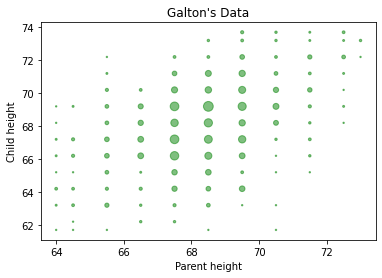

In [22]:
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

#### 1.2. Linear regression training:

In [5]:
# help(LinearRegression)

In [3]:
# Instantiate a linear regression object.
lm = LinearRegression(fit_intercept=True)

In [9]:
# Train.
lm.fit(df[['parent']],df[['child']])

LinearRegression()

In [10]:
# Show the slope.
lm.coef_

array([[0.64629058]])

In [11]:
# Show the intercept.
lm.intercept_

array([23.94153018])

#### 1.3. Visualization of the regression line

In [12]:
# Predicted Y.
predY = lm.predict(df[['parent']])

In [14]:
# predY

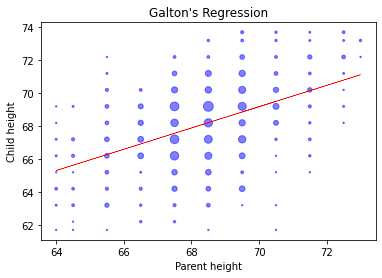

In [23]:
# Show the Scatter plot + Regression line.
plt.plot(df.parent.values,predY,c = 'red',linestyle='-',linewidth=0.5)
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='blue',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Regression")
plt.show()

### 1. Linear regression and diagnostics:

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics

1.1. Load the 'Boston' dataset from Scikit-Learn:

In [27]:
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [28]:
# Display the dictionary keys.
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [29]:
# Display the description on the data.
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
# The explanatory variables.
X = data['data']
header = data['feature_names']

In [31]:
# The response variable.
Y = data['target']
Y = Y.reshape(-1, 1)

In [32]:
Y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19


1.2. Convert the data into a DataFrame and then explore:

In [33]:
df = pd.DataFrame(np.append(X,Y,axis = 1))
df.columns = list(header)+['PRICE']

In [34]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
# Descriptive statistics of the variables (columns).
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
# Pair-wise correlation matrix.
np.round(df.corr(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


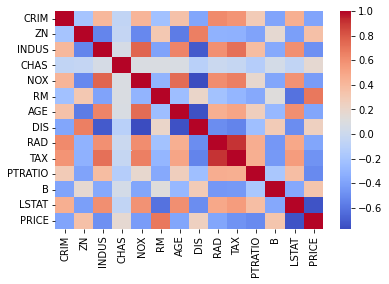

In [37]:
# Visualize the correlation matrix.
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

In [45]:
X[:,5]

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [46]:
Y[:,0]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

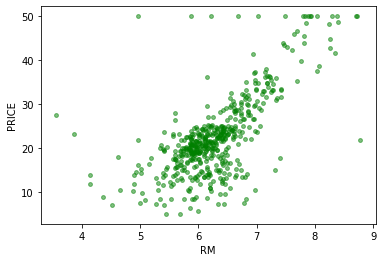

In [38]:
# Visualize RM vs PRICE.
plt.scatter(X[:,5],Y[:,0],c = 'g',s=15,alpha=0.5)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()

1.3. Train by linear regression:

In [39]:
# Train.
lm = LinearRegression(fit_intercept=True)
lm.fit(X,Y)

LinearRegression()

In [43]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [44]:
# Y

In [40]:
# The intercept.
lm.intercept_

array([36.45948839])

In [41]:
# The rest of coefficients (parameters).
lm.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [47]:
# Display the parameters as a DataFrame.
parametersDF = pd.DataFrame(lm.coef_,index=['Parameter Value'],columns=header)
parametersDF['Intercept'] = lm.intercept_[0]
parametersDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Intercept
Parameter Value,-0.108011,0.04642,0.020559,2.686734,-17.766611,3.809865,0.000692,-1.475567,0.306049,-0.012335,-0.952747,0.009312,-0.524758,36.459488


1.4. Diagnostics:

In [48]:
# In-sample prediction.
predY = lm.predict(X)

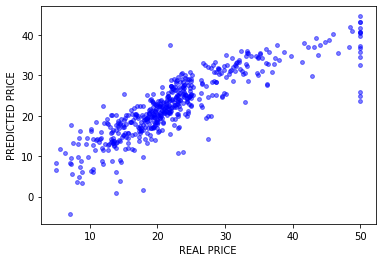

In [49]:
# Display real Y vs predicted Y.
plt.scatter(Y,predY,c = 'blue', s=15, alpha=0.5)
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

In [50]:
# Calculate the correlation between the real Y and predicted Y.
pd.Series(Y[:,0]).corr(pd.Series(predY[:,0]))

0.8606059865637753

In [51]:
# Coefficient of determination (R^2):
lm.score(X,Y)

0.7406426641094095